In [182]:
import mne
import numpy as np

In [183]:
channel_names_scut = ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8',
                      'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10',
                      'POz', 'F1', 'F2', 'C1', 'C2', 'P1', 'P2', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4',
                      'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'AF7', 'AF8', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8',
                      'FT9', 'FT10', 'Fpz', 'CPz', 'FCz']
fs_dict = {'KUL': 128, 'DTU': 512, 'SCUT': 1000}
montage_dict = {'KUL': 'biosemi64', 'DTU': 'biosemi64', 'SCUT': 'standard_1020'}
def set_info(dataset_name, is_add=False):
    """
    设置电极信号（用于mne的数据格式转换）
    Args:
        dataset_name:数据库名称
        is_add: DTU 是否需要额外的通道数量。

    Returns:
          info：通道数据等

    """

    if dataset_name == 'SCUT':
        ch_names = channel_names_scut
    else:
        ch_names = mne.channels.make_standard_montage(montage_dict[dataset_name]).ch_names
    ch_types = list(['eeg' for _ in range(len(ch_names))])

    if dataset_name == 'DTU' and is_add:
        ch_names = ch_names + ['ecg1', 'ecg2', 'eog1', 'eog2', 'eog3', 'eog4', 'eog5', 'eog6']
        ch_types = ch_types + ['ecg', 'ecg', 'eog', 'eog', 'eog', 'eog', 'eog', 'eog']

    info = mne.create_info(ch_names, fs_dict[dataset_name], ch_types)
    info.set_montage(montage_dict[dataset_name])

    return info


In [184]:
# ['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2']
# 假设attention矩阵维度为[64]，需要把维度变换为[64, 1]，这里演示使用的排序后的随机数矩阵。注意通道要对应，KUL和DTU的64通道先后顺序如上。SCUT数据库顺序是上面channel_names_scut。
data = np.random.randn(64) / 1000 / 1000
# data = np.sort(data)
data = data[:, None]

# 设置脑电电极信息
info = set_info("KUL")

# epochs的数量
nave = data.shape[0]

# 给evoked起一个名称
comment = "test"

# 利用mne.EvokedArray创建Evoked对象
evoked_array = mne.EvokedArray(data, info, comment=comment, nave=nave)
print(evoked_array)

<Evoked | 'test' (average, N=64), 0 – 0 sec, baseline off, 64 ch, ~91 kB>


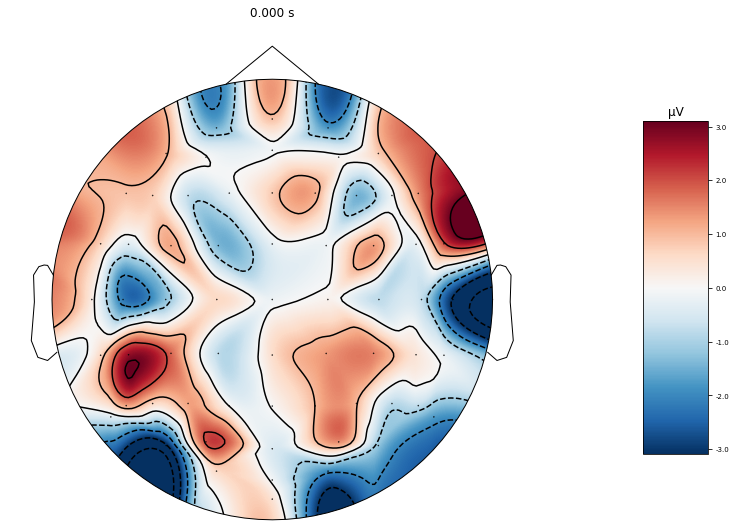

In [185]:
# extrapolate控制地形图绘制范围， size控制图整体大小，res控制图的分辨率
fig = evoked_array.plot_topomap(times=0, ch_type='eeg', extrapolate='head', size=6, res=128)

In [186]:
# 将可视化图像保存成背景透明的png格式，这里没有瑕疵的是，图像带有默认的标题和比例尺，而且无法通过设置参数去除。
# 两个可行的解决办法：一个是把标题和比例尺截掉，另一个是将plot_topomap函数里面的代码复制出来，并去掉标题和比例尺相关的代码
fig.savefig(f"./test.png", format='png', transparent=True)

In [186]:
# 参考网站：官网例子 https://mne.tools/stable/auto_examples/visualization/evoked_topomap.html
# 博客：https://blog.csdn.net/qq_45347768/article/details/120004574?spm=1001.2014.3001.5501